# Importing Libraries

In [1]:
import torch
#from torch import nn
#from torchvision import datasets, models, transforms
from torchvision import models, transforms

#import numpy as np

#import requests

import matplotlib as mpl
#import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
#from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from PIL import Image, ImageOps

#from git.repo.base import Repo
#from itertools import chain
#import random
import reprlib
import sys

# Configuring Visualization Parameters

In [2]:
%matplotlib inline

In [3]:
XINHUI = "#7a7374"
XUEBAI = "#fffef9"
YINBAI = "#f1f0ed"
YINHUI = "#918072"

figure_size = (16, 9)

In [4]:
custom_params = {
    "axes.axisbelow": True,
    "axes.edgecolor": YINBAI,
    "axes.facecolor": XUEBAI,
    "axes.grid": True,
    "axes.labelcolor": XINHUI,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.titlecolor": XINHUI,
    "figure.edgecolor": YINBAI,
    "figure.facecolor": XUEBAI,
    "grid.alpha": .8,
    "grid.color": YINBAI,
    "grid.linestyle": "--",
    "grid.linewidth": 1.2,
    "legend.edgecolor": YINHUI,
    "patch.edgecolor": XUEBAI,
    "patch.force_edgecolor": True,
    "text.color": XINHUI,
    "xtick.color": YINHUI,
    "ytick.color": YINHUI,
}

mpl.rcParams.update(custom_params)

# Configuring Other Notebook Parameters

In [5]:
reprlib_rules = reprlib.Repr()
reprlib_rules.maxother = 250

# Pre-installing Custom Functions

In [6]:
sys.path.append("../")

In [7]:
from Modules import *

In [8]:
def im_convert(tensor):
    image = tensor.cpu().clone().detach().numpy()
    image = image.transpose(1, 2, 0)
    image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
    image = image.clip(0, 1)
    return image

In [9]:
#def tensor_to_image(tensor):
#    transform = transforms.ToPILImage()
#    return transform(tensor)
#
#
#def grayscale_image(image):
#    transform = transforms.Grayscale()
#    return transform(image)
#
#
#def grayscale_image_conversion(image):
#    transform = transforms.Compose([
#        transforms.Resize((224, 224)),
#        transforms.ToTensor(),
#        transforms.Normalize((0.5, ), (0.5, ))
#    ])
#    return transform(image)
#
#
#def grayscale_im_convert(tensor):
#    image = tensor_to_image(tensor)
#    image = grayscale_image(image)
#    tensor = grayscale_image_conversion(image).permute(1, 2, 0)
#    array = tensor.clone().detach().numpy()
#    array = array.reshape(array.shape[0], -1)
#    array = array * 0.5 + 0.5
#    array = array.clip(0, 1)
#    return array

# Loading Datasets

In [10]:
#data_path = "../Datasets/ants_and_bees/"
#
#try:
#    Repo.clone_from("https://github.com/jaddoescad/ants_and_bees", data_path)
#except:
#    NameError

# Practicing in Stages

## VGG19

In [11]:
VGG19 = models.vgg19(weights="DEFAULT").features

for param in VGG19.parameters():
    param.requires_grad_(False)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Loading the features of the pre-trained VGG19 model from PyTorch")

statements = [
    """
VGG19 = models.vgg19(weights="DEFAULT").features

for param in VGG19.parameters():
    param.requires_grad_(False)
"""
]
tabulation.statement_generator(statements)

variables = ["VGG19"]
values = [str(VGG19)]
tabulation.variable_generator(variables, values)

Loading the features of the pre-trained VGG19 model from PyTorch

    +--------------------------------------------------+
    | Statement                                        |
    +--------------------------------------------------+
    | VGG19 = models.vgg19(weights="DEFAULT").features |
    |                                                  |
    | for param in VGG19.parameters():                 |
    |     param.requires_grad_(False)                  |
    +--------------------------------------------------+
    +----------+-------------------------------------------------+
    | Variable | Value                                           |
    +----------+-------------------------------------------------+
    | VGG19    | Sequential(                                     |
    |          |   (0): Conv2d(3, 64, kernel_size=(3, 3),        |
    |          |         stride=(1, 1), padding=(1, 1))          |
    |          |   (1): ReLU(inplace=True)                       |
    |    

In [12]:
device = torch.device("mps:0" if torch.backends.mps.is_available() else "cpu")

model = VGG19.to(device)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Enabling GPU training acceleration for the pre-trained VGG19 model")

statements = [
    """
device = torch.device("mps:0" if torch.backends.mps.is_available() else "cpu")

model = VGG19.to(device)
"""
]
tabulation.statement_generator(statements)

variables = ["device", "model"]
values = [str(device), str(model)]
tabulation.variable_generator(variables, values)

expressions = ["device.index"]
results = [str(device.index)]
tabulation.expression_generator(expressions, results)

Enabling GPU training acceleration for the pre-trained VGG19 model

    +---------------------------------------------------+
    | Statement                                         |
    +---------------------------------------------------+
    | device = torch.device("mps:0" if                  |
    |     torch.backends.mps.is_available() else "cpu") |
    |                                                   |
    | model = VGG19.to(device)                          |
    +---------------------------------------------------+
    +----------+-------------------------------------------------+
    | Variable | Value                                           |
    +----------+-------------------------------------------------+
    | device   | mps:0                                           |
    | model    | Sequential(                                     |
    |          |   (0): Conv2d(3, 64, kernel_size=(3, 3),        |
    |          |         stride=(1, 1), padding=(1, 1))          |

## Image Transforms

In [13]:
def load_image(img_path, max_size=400, shape=None):
    image = Image.open(img_path).convert("RGB")

    if max(image.size) > max_size:
        size = max_size
    else:
        size = max(image.size)

    in_transform = transforms.Compose([
        transforms.Resize(size),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    image = in_transform(image).unsqueeze(0)

    return image


tabulation = Form_Generator()
tabulation.heading_printer(
    "Function definition to load an image from a specified file path")

definitions = [
    """
def load_image(img_path, max_size=400, shape=None):
    image = Image.open(img_path).convert("RGB")

    if max(image.size) > max_size:
        size = max_size
    else:
        size = max(image.size)

    in_transform = transforms.Compose([
        transforms.Resize(size),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    image = in_transform(image).unsqueeze(0)

    return image
"""
]
tabulation.definition_generator(definitions)

Function definition to load an image from a specified file path

    +----------------------------------------------------------+
    | Definition                                               |
    +----------------------------------------------------------+
    | def load_image(img_path, max_size=400, shape=None):      |
    |     image = Image.open(img_path).convert("RGB")          |
    |                                                          |
    |     if max(image.size) > max_size:                       |
    |         size = max_size                                  |
    |     else:                                                |
    |         size = max(image.size)                           |
    |                                                          |
    |     in_transform = transforms.Compose([                  |
    |         transforms.Resize(size),                         |
    |         transforms.ToTensor(),                           |
    |         transforms.

In [14]:
content_1 = load_image("../Images/city_night_view.jpg").to(device)
content_2 = load_image("../Images/Mona_Lisa.jpg").to(device)
style = load_image("../Images/The_Starry_Night.jpg").to(device)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Loading and transformation of content and style images")

statements = [
    """
content_1 = load_image("../Images/city_night_view.jpg").to(device)
content_2 = load_image("../Images/Mona_Lisa.jpg").to(device)
style = load_image("../Images/The_Starry_Night.jpg").to(device)
"""
]
tabulation.statement_generator(statements)

variables = ["content_1", "content_2", "style"]
values = [
    str(reprlib_rules.repr(content_1.cpu())),
    str(reprlib_rules.repr(content_2.cpu())),
    str(reprlib_rules.repr(style.cpu()))
]
tabulation.variable_generator(variables, values)

expressions = ["content_1.shape", "content_2.shape", "style.shape"]
results = [str(content_1.shape), str(content_2.shape), str(style.shape)]
tabulation.expression_generator(expressions, results)

Loading and transformation of content and style images

    +-------------------------------------------------------------+
    | Statement                                                   |
    +-------------------------------------------------------------+
    | content_1 =                                                 |
    |     load_image("../Images/city_night_view.jpg").to(device)  |
    | content_2 =                                                 |
    |     load_image("../Images/Mona_Lisa.jpg").to(device)        |
    | style =                                                     |
    |     load_image("../Images/The_Starry_Night.jpg").to(device) |
    +-------------------------------------------------------------+
    +-----------+-------------------------------------------------+
    | Variable  | Value                                           |
    +-----------+-------------------------------------------------+
    | content_1 | tensor([[[[-0.7255, -0.7569, -0.7647,  ...

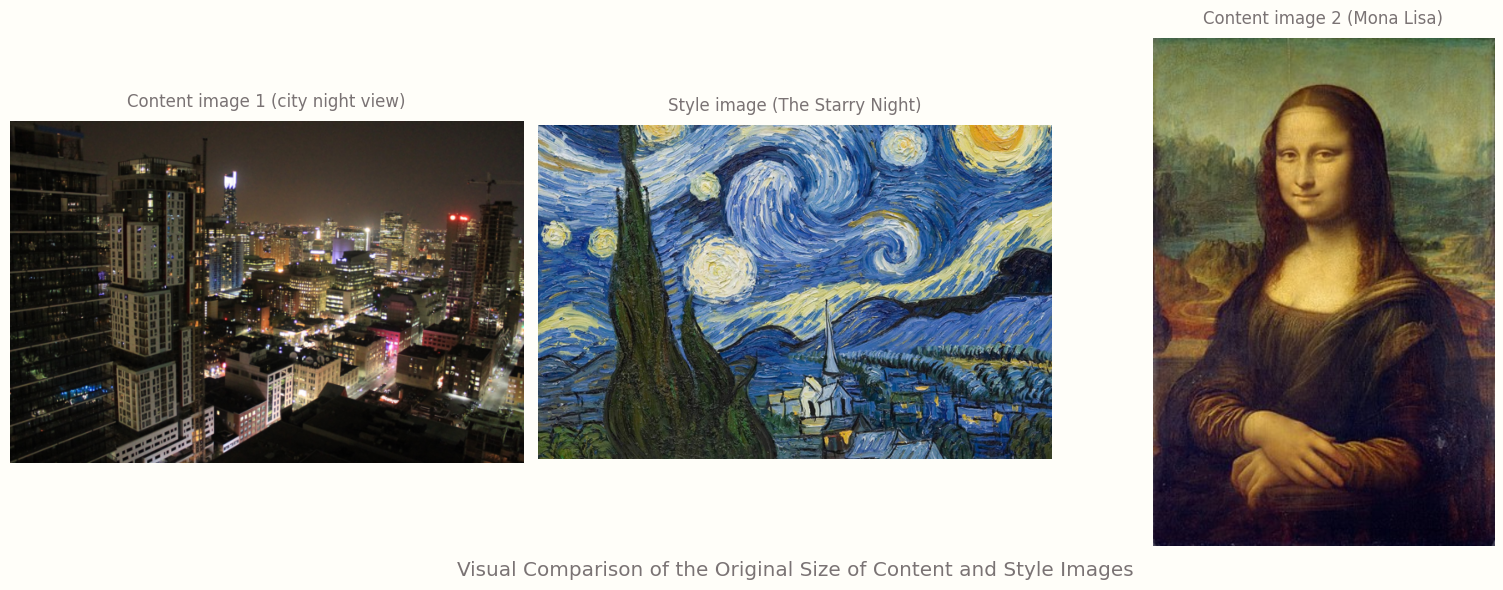

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1,
                                    3,
                                    figsize=(figure_size[0],
                                             figure_size[1] / 3 * 2))

ax1.imshow(im_convert(content_1.squeeze()))
ax1.set_title("Content image 1 (city night view)", loc="center", pad=10)
ax1.axis("off")

ax2.imshow(im_convert(style.squeeze()))
ax2.set_title("Style image (The Starry Night)", loc="center", pad=10)
ax2.axis("off")

ax3.imshow(im_convert(content_2.squeeze()))
ax3.set_title("Content image 2 (Mona Lisa)", loc="center", pad=10)
ax3.axis("off")

fig.suptitle(
    "Visual Comparison of the Original Size of Content and Style Images",
    fontsize="x-large",
    x=0.5,
    y=0)

plt.tight_layout()
plt.show()

In [16]:
def load_image(img_path, max_size=400, shape=None):
    image = Image.open(img_path).convert("RGB")

    if max(image.size) > max_size:
        size = max_size
    else:
        size = max(image.size)

    if shape is not None:
        size = shape

    in_transform = transforms.Compose([
        transforms.Resize(size),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    image = in_transform(image).unsqueeze(0)

    return image


tabulation = Form_Generator()
tabulation.heading_printer(
    "Function definition to load and resize an image from a specified file path"
)

definitions = [
    """
def load_image(img_path, max_size=400, shape=None):
    image = Image.open(img_path).convert("RGB")

    if max(image.size) > max_size:
        size = max_size
    else:
        size = max(image.size)

    if shape is not None:
        size = shape

    in_transform = transforms.Compose([
        transforms.Resize(size),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    image = in_transform(image).unsqueeze(0)

    return image
"""
]
tabulation.definition_generator(definitions)

Function definition to load and resize an image from a specified file path

    +----------------------------------------------------------+
    | Definition                                               |
    +----------------------------------------------------------+
    | def load_image(img_path, max_size=400, shape=None):      |
    |     image = Image.open(img_path).convert("RGB")          |
    |                                                          |
    |     if max(image.size) > max_size:                       |
    |         size = max_size                                  |
    |     else:                                                |
    |         size = max(image.size)                           |
    |                                                          |
    |     if shape is not None:                                |
    |         size = shape                                     |
    |                                                          |
    |     in_t

In [17]:
content_1 = load_image("../Images/city_night_view.jpg").to(device)
content_2 = load_image("../Images/Mona_Lisa.jpg").to(device)
style_1 = load_image("../Images/The_Starry_Night.jpg",
                     shape=content_1.shape[-2:]).to(device)
style_2 = load_image("../Images/The_Starry_Night.jpg",
                     shape=content_2.shape[-2:]).to(device)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Reloading and transformation of content and style images")

statements = [
    """
content_1 = load_image("../Images/city_night_view.jpg").to(device)
content_2 = load_image("../Images/Mona_Lisa.jpg").to(device)
style_1 = load_image("../Images/The_Starry_Night.jpg",
                     shape=content_1.shape[-2:]).to(device)
style_2 = load_image("../Images/The_Starry_Night.jpg",
                     shape=content_2.shape[-2:]).to(device)
"""
]
tabulation.statement_generator(statements)

variables = ["content_1", "content_2", "style_1", "style_2"]
values = [
    str(reprlib_rules.repr(content_1.cpu())),
    str(reprlib_rules.repr(content_2.cpu())),
    str(reprlib_rules.repr(style_1.cpu())),
    str(reprlib_rules.repr(style_2.cpu()))
]
tabulation.variable_generator(variables, values)

expressions = [
    "content_1.shape", "content_2.shape", "style_1.shape", "style_2.shape"
]
results = [
    str(content_1.shape),
    str(content_2.shape),
    str(style_1.shape),
    str(style_2.shape)
]
tabulation.expression_generator(expressions, results)

Reloading and transformation of content and style images

    +-------------------------------------------------------------+
    | Statement                                                   |
    +-------------------------------------------------------------+
    | content_1 =                                                 |
    |     load_image("../Images/city_night_view.jpg").to(device)  |
    | content_2 =                                                 |
    |     load_image("../Images/Mona_Lisa.jpg").to(device)        |
    | style_1 = load_image("../Images/The_Starry_Night.jpg",      |
    |                      shape=content_1.shape[-2:]).to(device) |
    | style_2 = load_image("../Images/The_Starry_Night.jpg",      |
    |                      shape=content_2.shape[-2:]).to(device) |
    +-------------------------------------------------------------+
    +-----------+-------------------------------------------------+
    | Variable  | Value                                   

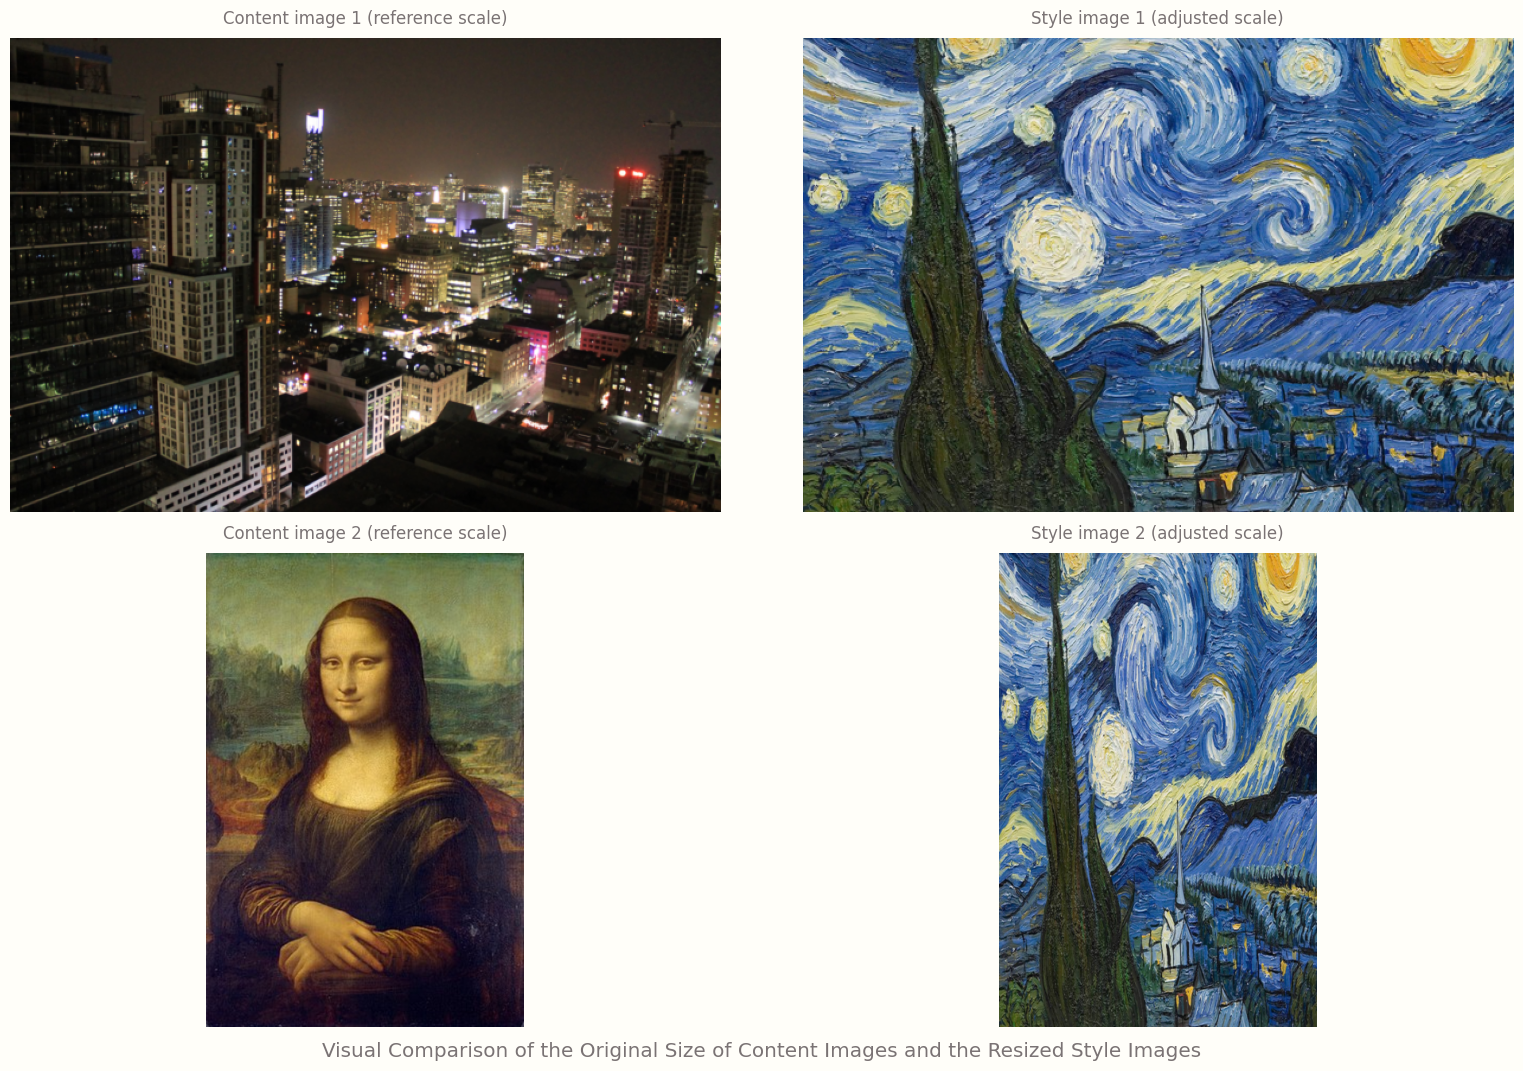

In [18]:
plt.rcParams["figure.figsize"] = (figure_size[0], figure_size[1] / 5 * 6)

fig, axs = plt.subplots(2, 2)

axs[0, 0].imshow(im_convert(content_1.squeeze()))
axs[0, 0].set_title("Content image 1 (reference scale)", loc="center", pad=10)

axs[0, 1].imshow(im_convert(style_1.squeeze()))
axs[0, 1].set_title("Style image 1 (adjusted scale)", loc="center", pad=10)

axs[1, 0].imshow(im_convert(content_2.squeeze()))
axs[1, 0].set_title("Content image 2 (reference scale)", loc="center", pad=10)

axs[1, 1].imshow(im_convert(style_2.squeeze()))
axs[1, 1].set_title("Style image 2 (adjusted scale)", loc="center", pad=10)

for ax in axs.flat:
    ax.axis("off")

fig.suptitle(
    "Visual Comparison of the Original Size of Content Images and "
    "the Resized Style Images",
    fontsize="x-large",
    x=0.5,
    y=0)

plt.tight_layout()
plt.show()

## Feature Extraction

In [19]:
def get_features(image, model):
    layers = {
        "0": "conv1_1",
        "5": "conv2_1",
        "10": "conv3_1",
        "19": "conv4_1",
        "21": "conv4_2",
        "28": "conv5_1"
    }

    features = {}

    for name, layer in model._modules.items():
        image = layer(image)
        if name in layers:
            features[layers[name]] = image

    return features


tabulation = Form_Generator()
tabulation.heading_printer("Function definition to extract features")

definitions = [
    """
def get_features(image, model):
    layers = {
        "0": "conv1_1",
        "5": "conv2_1",
        "10": "conv3_1",
        "19": "conv4_1",
        "21": "conv4_2",
        "28": "conv5_1"
    }

    features = {}

    for name, layer in model._modules.items():
        image = layer(image)
        if name in layers:
            features[layers[name]] = image

    return features
"""
]
tabulation.definition_generator(definitions)

Function definition to extract features

    +------------------------------------------------+
    | Definition                                     |
    +------------------------------------------------+
    | def get_features(image, model):                |
    |     layers = {                                 |
    |         "0": "conv1_1",                        |
    |         "5": "conv2_1",                        |
    |         "10": "conv3_1",                       |
    |         "19": "conv4_1",                       |
    |         "21": "conv4_2",                       |
    |         "28": "conv5_1"                        |
    |     }                                          |
    |                                                |
    |     features = {}                              |
    |                                                |
    |     for name, layer in model._modules.items(): |
    |         image = layer(image)                   |
    |         if name in

In [20]:
content_features_1 = get_features(content_1, model)
content_features_2 = get_features(content_2, model)
style_features_1 = get_features(style_1, model)
style_features_2 = get_features(style_2, model)

tabulation = Form_Generator()
tabulation.heading_printer("Feature extraction for content and style images")

statements = [
    """
content_features_1 = get_features(content_1, model)
content_features_2 = get_features(content_2, model)
style_features_1 = get_features(style_1, model)
style_features_2 = get_features(style_2, model)
"""
]
tabulation.statement_generator(statements)

variables = [
    "content_features_1", "content_features_2", "style_features_1",
    "style_features_2"
]
values = [
    str(
        reprlib_rules.repr({
            key: reprlib_rules.repr(value.cpu())
            for key, value in content_features_1.items()
        })),
    str(
        reprlib_rules.repr({
            key: reprlib_rules.repr(value.cpu())
            for key, value in content_features_2.items()
        })),
    str(
        reprlib_rules.repr({
            key: reprlib_rules.repr(value.cpu())
            for key, value in style_features_1.items()
        })),
    str(
        reprlib_rules.repr({
            key: reprlib_rules.repr(value.cpu())
            for key, value in style_features_2.items()
        }))
]
tabulation.variable_generator(variables, values, 0)

expressions = [
    "content_features_1.keys()", "content_features_2.keys()",
    "style_features_1.keys()", "style_features_2.keys()"
]
results = [
    str(content_features_1.keys()),
    str(content_features_2.keys()),
    str(style_features_1.keys()),
    str(style_features_2.keys())
]
tabulation.expression_generator(expressions, results)

Feature extraction for content and style images

    +-----------------------------------------------------+
    | Statement                                           |
    +-----------------------------------------------------+
    | content_features_1 = get_features(content_1, model) |
    | content_features_2 = get_features(content_2, model) |
    | style_features_1 = get_features(style_1, model)     |
    | style_features_2 = get_features(style_2, model)     |
    +-----------------------------------------------------+
    +--------------------+---------------------------------------+
    | Variable           | Value                                 |
    +--------------------+---------------------------------------+
    | content_features_1 | {'conv1_1': 'tensor([[[[0...,         |
    |                    | 0.0000]]]])', 'conv2_1':              |
    |                    | 'tensor([[[[0..., 0.0000]]]])',       |
    |                    | 'conv3_1': 'tensor([[[[0...,          |
  

## The Gram Matrix